In [1]:
import numpy as np

x = np.array([-1.0, 1.0, 2.0])
print(x)

y = x> 0
print(y)

[-1.  1.  2.]
[False  True  True]


넘파이 배열에 부등호 연산을 수행하면 배열 원소 각각에 부등호 연산을 수행한 bool배열이 생성된다.

int형 bool 값인 0과 1로 출력하기 위해 np.int를 사용하자


In [2]:
y = y.astype(np.int)
print(y)

[0 1 1]


/var/folders/dc/g57m8q995hl0n65_3pr5fxnr0000gn/T/ipykernel_32706/4147947644.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)


### 계단 함수의 그래프

/var/folders/dc/g57m8q995hl0n65_3pr5fxnr0000gn/T/ipykernel_32706/349877107.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array( x >0, dtype=np.int)


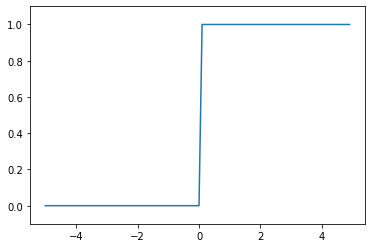

In [6]:
import matplotlib.pylab as plt

def step_function(x):
  return np.array( x >0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

계단 함수는 비교연산을 통한 bool값을 0과 1로 출력한다.

### 시그모이드 함수

In [8]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

배열을 넣으면 비교 연산을 통해 bool값을 재할당한 것처럼
함수의 계산식을 통한 값들이 배열의 값에 재할당된다.

이러한 것이 가능한 것이 넘파이의 '브로드캐스트' 기능에 있다.
브로드캐스트 기능이란 넘파이 배열과 스칼라 값의 연산을 넘파이 배열의 원소 각각과 스칼라 값의 연산으로 바꿔 수행하는 것이다.

In [9]:
t = np.array([1.0, 2.0, 3.0])
print(1.0 + t)

print(1.0/t)

[2. 3. 4.]
[1.         0.5        0.33333333]


시그모이드 함수의 그래프를 그려보자

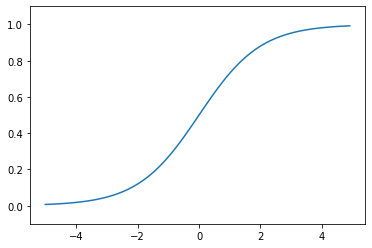

In [11]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

### ReLU 함수

Rectified Linear Unit의 줄임말로, 정류된 선형 단위 모델이다.
입력이 0을 넘으면 입력 그대로 출력하고, 0이하이면 0을 출력하는 함수


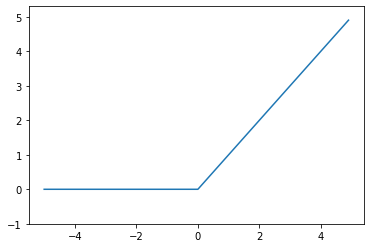

In [14]:
def relu(x):
  return np.maximum(0,x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x,y)
plt.ylim(-1.0,5.3)
plt.show()

## 다차원 배열의 계산
1차원을 넘어 N차원의 배열에 대한 계산을 해보자.


In [15]:
import numpy as np
A = np.array([1,2,3,4])
print(A)

print(np.ndim(A))

print(A.shape)

print(A.shape[0])


[1 2 3 4]
1
(4,)
4


In [18]:
B = np.array([[1,2],[3,4],[5,6]])
print(B)

print(np.ndim(B))

print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


2차원 배열의 shape 값은 튜플로 각 차원의 길이를 나타낸다.

## 행렬의 곱


In [19]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])

C = np.dot(A,B)

print(C)

[[19 22]
 [43 50]]


## 신경망에서의 행렬 곱

In [20]:
X = np.array([1,2])
print(X.shape)

W = np.array([[1,3,5],[2,4,6]])

Y = np.dot(X,W)
Z = np.dot(W,X)

print(Y)
print(Z)


(2,)


ValueError: shapes (2,3) and (2,) not aligned: 3 (dim 1) != 2 (dim 0)

입력층 X의 2개의 데이터가 W라는 은닉층을 거쳐 출력층 Y의 값으로 출력된다.

[2,3] 층에 맞게 2개의 데이터가 들어왔서 Y는 출력됐지만
[2,3] 배열 뒤에 [2,1]배열을 넣으면 오류가 발생한다.

## 3층 신경망 구현하기

앞서 본 것처럼 은닉층은 입력층의 데이터를 